<a href="https://hubconexa.com/">
    <img alt="Conexa labs logo" src="./img/conexa-logo.svg" style="height:70px; align:left">
</a>

<h1 align=center><font size=5>Desafio Data Analyst</font></h1>

<h1>Relatório</h1>

<h3>Contexto</h3>

Este relatório foi elaborado como pré-requisito para prosseguimento no processo seletivo para a vaga de analista de dados na companhia Conexa - Hub de Inovação Siagri.

<h2>Sumário</h2>

1) [Introdução](#intro)<br>
2) [Análise exploratória](#data_exploration)<br>
a. [Qual a estrutura do dataset?](#question_1)<br>
b. [Há inconsistências nos dados disponíveis?](#question_2)<br>
c. [Quais as principais características das variáveis?](#question_3)<br>
d. [Qual o intervalo de tempo analisado?](#question_4)<br>
3) [Tratamento de dados](#data_cleaning)<br>
a. [Eliminação de dados ausentes](#handle_missing)<br>
b. [Segmentação do período desejado](#define_period)<br>
4) [Visualização](#data_visualization)<br>
a. [Jogos mais vendidos](#visualization_1)<br>
b. [Total de vendas](#visualization_2)<br>
c. [Vendas por plataforma](#visualization_3)<br>
d. [Número de vendas por gênero](#visualization_4)<br>
e. [Total de vendas por editora](#visualization_5)<br>
f. [Mapa de palavras](#visualization_6)<br>
5) [Conclusão](#conclusion)

<hr>

# 1. Introdução <a id="intro" />

<div style="text-align: justify">
Foram disponibilizados dois datasets, sendo necessária a escolha de um deles. O primeiro conjunto de dados é referente à venda de jogos digitais, enquanto que o segundo traz informações sobre os passageiros do navio titanic. O mercado de jogos digitais movimenta <a href="https://www.statista.com/topics/868/video-games/#:~:text=Video%20games%20are%20a%20billion,over%2077%20billion%20U.S.%20dollars.">bilhões de dólares</a> todos os anos. O Brasil é, atualmente, o <a href="https://valorinveste.globo.com/objetivo/empreenda-se/noticia/2019/07/30/brasil-e-o-13o-maior-mercado-de-games-do-mundo-e-o-maior-da-america-latina.ghtml">13º maior mercado de jogos no mundo<a>. Há fortes indícios de que o <a href="https://revistapegn.globo.com/Tecnologia/noticia/2020/08/mercado-de-games-escapa-da-crise-e-cresce-com-isolamento-social.html">desenvolvimento de jogos nacional ainda deve crescer bastante</a>. Desse modo, optou-se pela análise do dataset referente à venda de jogos digitais. Com isso, espera-se gerar insights que permitam aos desenvolvedores de jogos nacionais visualizarem formas de otimizar a rentabilidade desse mercado.
</div>

# 2. Análise Exploratória <a id="data_exploration"></a>

### Importação do dataset

<p>
O dataset pode ser encontrado no link: <a href="https://github.com/conexalabs/desafio-data-analyst/blob/main/data/selling_games.parquet">https://github.com/conexalabs/desafio-data-analyst/blob/main/data/selling_games.parquet</a>. 
</p>

In [1]:
!pip install pyarrow

import pandas as pd
import numpy as np

### Leitura dos dados a partir do arquivo

A tabela abaixo indica um resumo sobre os dados importados.

In [2]:
filename = "./data/selling_games.parquet"
df = pd.read_parquet(filename, engine='pyarrow')
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### a. Qual a estrutura do dataset?<a id="question_1"></a>

A dimensão do conjunto de dados é apresentada abaixo.

In [3]:
df.shape

(16598, 10)

Pode-se afirmar que existem 16.598 linhas e 10 colunas. A tabela abaixo apresenta um detalhamento das informações contidas em cada coluna.

Campo | Descrição
----- | ---------
Name | Nome do jogo
Platform | Plataforma de lançamento dos jogos (PC, PS4, etc.)
Year | Ano de lançamento do jogo
Genre | Gênero do jogo
Publisher | Editora do jogo
NA_Sales | Vendas na América do Norte (em milhões)
EU_Sales | Vendas na Europa (em milhões)
JP_Sales | Vendas no Japão (em milhões)
Other_Sales | Vendas no resto do mundo (em milhões)
Global_Sales | Total de vendas mundiais.

### b. Há inconsistências nos dados disponíveis? <a id="question_2"></a>

A tabela abaixo apresenta um resumo sobre o dataset.

In [4]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Percebe-se uma discrepância na contagem de valores entre as colunas, o que indica a ausência de dados em algumas linhas.

#### Dados ausentes <a id="missing_data"></a>

A quantidade de dados ausentes por coluna é indicada abaixo.

In [5]:
missing_data = df.isnull().sum()
print(missing_data)

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


Baseado nos dados acima, constata-se que das 16.598 linhas, duas colunas apresentaram dados ausentes: 'Year' e 'Publisher'. O gráfico abaixo apresenta a distribuição dos dados ausentes.

In [6]:
!pip install matplotlib-venn

import matplotlib.pyplot as plt
from matplotlib_venn import venn2

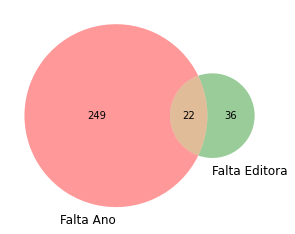

In [7]:
missing_total = df.isnull().any(axis=1).sum()
missing_publisher = missing_total - 271
missing_year = missing_total - 58
missing_both = missing_total - missing_year - missing_publisher

venn2(subsets = (missing_year, missing_publisher, missing_both), set_labels = ('Falta Ano', 'Falta Editora'))
plt.show()

<strong>Total:</strong> 307

Do total de 16.598 linhas, 307 possuem valores ausentes. Dessa forma, surge a necessidade de tratamento dos dados.

#### Dados duplicados <a id="duplicate_data"></a>

A seguir, foi efetuada a análise quanto à presença de linhas duplicadas.

In [8]:
df[df.duplicated(keep=False)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
14997,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.0,0.0,0.02,0.0,0.02
14999,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.0,0.0,0.02,0.0,0.02


A tabela acima evidencia a presença de uma única duplicata, a qual deve ser removida durante o tratamento de dados. Vale ressaltar que o ano é um dado ausente para esses registros. Dessa forma, é razoável afirmar que esses dois itens serão removidos com a eliminação de dados ausentes.

### c. Quais as principais características das variáveis?

#### Tipos

Os tipos de dados de cada coluna são indicados abaixo.

In [9]:
print(df.dtypes)

Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


<div style="text-align: justify">
As variáveis nome, plataforma, gênero e editora podem ser consideradas categóricas, enquanto que as demais, quantitativas. A variável ano é do tipo discreta, enquanto que o número de vendas representa um valor contínuo.
</div>

<div style="text-align: justify">
Dados númericos devem, preferencialmente, ser apresentados nos formatos 'float' ou 'int'. Dados categóricos, por outro lado, normalmente são do tipo 'object'. Desse modo, pode-se afirmar que os tipos identificados acima atendem a esse requisito. A coluna 'Year' poderia ser do tipo 'datetime'. No entanto, tendo em vista que apenas o ano foi indicado, não se vislumbra necessidade de efetuar conversão de tipo nessa coluna.
</div>

#### Correlação

O gráfico abaixo indica a correlação entre as variáveis continuas.

<AxesSubplot:>

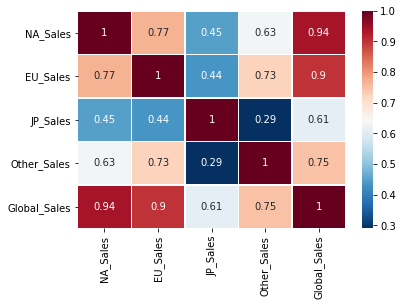

In [10]:
import seaborn as sns

data = df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]]
corr = data.corr()

sns.heatmap(corr, 
    xticklabels=corr.columns,
    yticklabels=corr.columns,
    cmap='RdBu_r',
    annot=True,
    linewidth=0.5)

<div style="text-align: justify">
Analisando os valores, é possível observar que o mercado norte americano e o europeu apresentam um forte relacionamento com o total de vendas globais. Além disso, o mercado japonês apresenta a menor correlação com os demais mercados. Desse modo, é razoável supor que o Japão apresente um mercado predominantemente doméstico. 
</div>

#### Plataformas

É importante avaliar a quantidade de plataformas únicas.

In [11]:
# Importação do pacote com módulos auxiliares
from utils import helpers

In [12]:
helpers.print_unique(df['Platform'])

Total:  31
['2600' '3DO' '3DS' 'DC' 'DS' 'GB' 'GBA' 'GC' 'GEN' 'GG' 'N64' 'NES' 'NG'
 'PC' 'PCFX' 'PS' 'PS2' 'PS3' 'PS4' 'PSP' 'PSV' 'SAT' 'SCD' 'SNES' 'TG16'
 'WS' 'Wii' 'WiiU' 'X360' 'XB' 'XOne']


Há 31 plataformas no dataset analisado.

#### Gêneros

Os gêneros presentes no conjunto de dados são indicados a seguir.

In [13]:
helpers.print_unique(df['Genre'])

Total:  12
['Action' 'Adventure' 'Fighting' 'Misc' 'Platform' 'Puzzle' 'Racing'
 'Role-Playing' 'Shooter' 'Simulation' 'Sports' 'Strategy']


Foram identificados 12 gêneros distintos.

#### Editoras

As editoras do dataset são relacionadas abaixo.

In [14]:
helpers.print_unique(df['Publisher'])

Total:  578
['10TACLE Studios' '1C Company' '20th Century Fox Video Games' '2D Boy'
 '3DO' '49Games' '505 Games' '5pb' '7G//AMES' '989 Sports' '989 Studios'
 'AQ Interactive' 'ASC Games' 'ASCII Entertainment' 'ASCII Media Works'
 'ASK' 'Abylight' 'Acclaim Entertainment' 'Accolade' 'Ackkstudios'
 'Acquire' 'Activision' 'Activision Blizzard' 'Activision Value'
 'Adeline Software' 'Aerosoft' 'Agatsuma Entertainment' 'Agetec'
 'Aksys Games' 'Alawar Entertainment' 'Alchemist' 'Alternative Software'
 'Altron' 'Alvion' 'American Softworks' 'Angel Studios' 'Answer Software'
 'Aqua Plus' 'Aques' 'Arc System Works' 'Arena Entertainment' 'Aria'
 'Arika' 'ArtDink' 'Aruze Corp' 'Ascaron Entertainment'
 'Ascaron Entertainment GmbH' 'Asgard' 'Asmik Ace Entertainment'
 'Asmik Corp' 'Aspyr' 'Astragon' 'Asylum Entertainment' 'Atari' 'Athena'
 'Atlus' 'Avalon Interactive' 'Avanquest' 'Avanquest Software' 'Axela'
 'BAM! Entertainment' 'BMG Interactive Entertainment' 'BPS' 'Banpresto'
 'Benesse' 'Berkeley'

Foi constatado um total de 578 editoras.

### d. Qual a frequência de itens por ano?

Indica-se abaixo o intervalo disponível no dataset.

In [15]:
helpers.print_unique(df['Year'])

Total:  39
[1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991.
 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003.
 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.
 2016. 2017. 2020.]


Pode-se constatar que há uma continuidade dos anos 1980 até 2017. No entanto, não há dados disponíveis para os anos de 2018 e 2019.

A frequência de cada ano é apresentada a seguir:

In [16]:
df['Year'].value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1983.0      17
1989.0      17
1990.0      16
1987.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

A pequena quantidade de jogos publicados a partir de 2017 motivou uma investigação nesse sentido. A tabela abaixo apresenta quais jogos foram publicados a partir da referida data.

In [28]:
df[df['Year'] >= 2017]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5860,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.00,0.02,0.29
14136,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.0,0.03,0.00,0.03
15944,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.0,0.01,0.00,0.01
16135,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.0,0.01,0.00,0.01


Foi descoberto que o ano de publicação desses 4 títulos não corresponde à realidade. O jogo 'Imagine: Makeup Artist', por exemplo, [foi lançado em 2009](https://pt.wikipedia.org/wiki/Imagine_(s%C3%A9rie)). Enquanto isso, o título 'Phantasy STar Online 2 Episode 4: Deluxe Package' [teve seu lançamento em 2016](https://www.play-asia.com/phantasy-star-online-2-episode-4-deluxe-package/13/709stt). Da mesma forma, o título 'Brothers Conflict: Precious Baby' [foi publicado no ano de 2016](https://en.wikipedia.org/wiki/Brothers_Conflict) para o console PS Vita. 

Desse modo, faz-se necessária a correção desses dados durante a fase de tratamento.

Vale ressaltar que a ausência de dados referentes aos anos 2017 a 2020 pode representar um fator limitante à análise.

# 3. Tratamento de dados <a id="data_cleaning"></a>

### a. Eliminação de dados ausentes <a id="handle_missing"></a>

Optou-se pela eliminação das linhas nas quais o ano ou editora não estivessem presentes.

In [24]:
df.dropna(subset=["Year", "Publisher"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(16291, 10)

Após a modificação, o número de registros foi reduzido de 16.598 para 16.291. A redução de 307 linhas é equivalente ao total de linhas com dados ausentes indicado no diagrama de venn da [seção b do capítulo 2](#duplicate_data)

### b. Eliminação de dados duplicados <a id="handle_duplicate"></a>

Conforme citado na [seção b do capítulo 2](#duplicate_data), a eliminação de registros com dados nulos assegura a remoção dos dados duplicados encontrados. Isso se deve ao fato de que foi encontrada apenas uma linha duplicada, a qual não apresentava o dado referente ao ano de publicação.

### c. Substituição do ano <a id="missing_handle"></a>

Constatou-se a incorreção dos dados referente ao ano na [seção d do capítulo 2](#question_4). A tabela abaixo indica o ano indicado e o ano verdadeiro para publicação dos títulos:

Nome | Plataforma | Ano indicado | Ano real
--------- | ------ |  ----- | -----
Imagine: Makeup Artist | DS | 2020 | 2009
Phantasy Star Online 2 Episode 4: Deluxe Package | PS4 | 2017 | 2016
Phantasy Star Online 2 Episode 4: Deluxe Package | PSV | 2017 | 2016
Brothers Conflict: Precious Baby | PSV | 2017 | 2016
___